In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score


In [2]:
# Load the reduced dataset
df = pd.read_csv("data/heart_selected.csv")

X = df.drop("target", axis=1)
y = df["target"]

print("Shape:", X.shape)
print(df.head())

Shape: (297, 10)
         ca   thalach   oldpeak    cp_4.0  thal_7.0       age      chol  \
0 -0.721976  0.017494  1.068965 -0.957146 -0.794901  0.936181 -0.276443   
1  2.478425 -1.816334  0.381773  1.044772 -0.794901  1.378929  0.744555   
2  1.411625 -0.899420  1.326662  1.044772  1.258018  1.378929 -0.353500   
3 -0.721976  1.633010  2.099753 -0.957146 -0.794901 -1.941680  0.051047   
4 -0.721976  0.978071  0.295874 -0.957146 -0.794901 -1.498933 -0.835103   

   trestbps     exang  slope_2.0  target  
0  0.750380 -0.696419  -0.925338       0  
1  1.596266  1.435916   1.080686       1  
2 -0.659431  1.435916   1.080686       1  
3 -0.095506 -0.696419  -0.925338       0  
4 -0.095506 -0.696419  -0.925338       0  


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (237, 10) Test shape: (60, 10)


In [4]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully")


Logistic Regression trained successfully
Decision Tree trained successfully
Random Forest trained successfully
SVM trained successfully


In [5]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    results.append([name, acc, prec, rec, f1, auc_score])

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        32
           1       0.85      0.61      0.71        28

    accuracy                           0.77        60
   macro avg       0.79      0.76      0.76        60
weighted avg       0.78      0.77      0.76        60


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81     

In [6]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])
results_df


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.833333,0.875,0.750000,0.807692,0.949777
1,Decision Tree,0.766667,0.850,0.607143,0.708333,0.756696
2,Random Forest,0.816667,0.840,0.750000,0.792453,0.909040
3,SVM,0.833333,0.875,0.750000,0.807692,0.940848


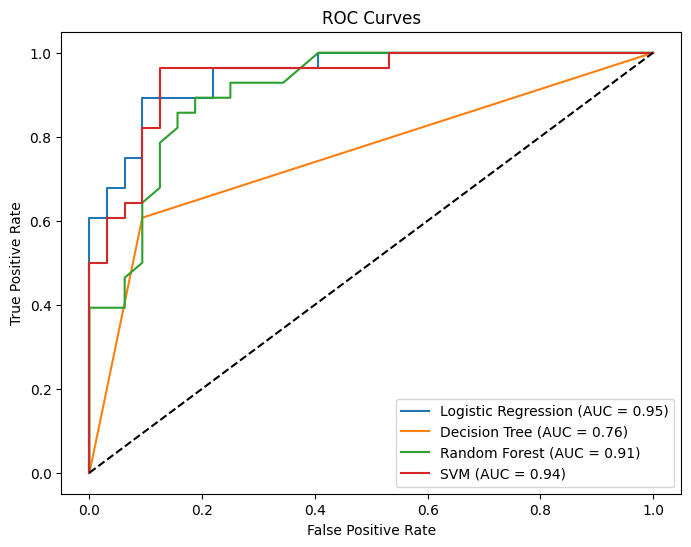

In [7]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
